<h3> Importing necessary libaries <h3>

In [234]:
import pandas as py
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



<h3> Loading the data <h3>

In [235]:
df = py.read_csv('amazon_2023_2024.csv')
five_years_df =  py.read_csv('amazon_stock_2020_2024.csv')

<h3> Converting  date index to date time format <h3>


In [236]:
df['Date'] = py.to_datetime(df['Date']) 
five_years_df ['Date'] =  py.to_datetime(df['Date'])

<h3> Checking for nulls <h3>

In [237]:

df.set_index('Date',inplace=True)
five_years_df.set_index('Date',inplace=True)
nulls =  df.isnull().any()
print()


<h3> Creating  datasets for  predicting closed price for the stock <h3>

<h4> For 5 years span <h4>

In [238]:
date_and_closing_pair_5 =  py.DataFrame({
    'Date':five_years_df.index,
    'Close':five_years_df['Close']
})

<h4> For 2023-2024

In [239]:

date_and_closing_pair = py.DataFrame({
    'Date' :df.index,
    'Closed':df['Close']
})

date_and_closing_pair.set_index('Date',inplace=True)

print(date_and_closing_pair)
has_null = date_and_closing_pair.isnull().values.any()
print(has_null)



                Closed
Date                  
2023-05-01  102.050003
2023-05-02  103.629997
2023-05-03  103.650002
2023-05-04  104.000000
2023-05-05  105.660004
...                ...
2024-04-25  173.669998
2024-04-26  179.619995
2024-04-29  180.960007
2024-04-30  175.000000
2024-05-01  179.000000

[253 rows x 1 columns]
False


<h3>  Plotting  the time series  from  2020 to 2024   <h3>

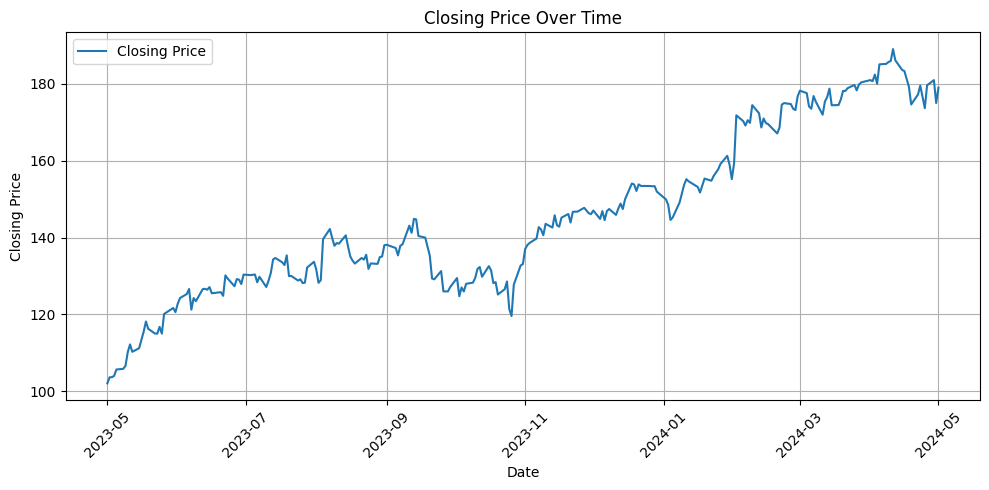

In [240]:
plt.figure(figsize=(10, 5))  
plt.plot(date_and_closing_pair.index, date_and_closing_pair['Closed'], label='Closing Price')
plt.title('Closing Price Over Time') 
plt.xlabel('Date')  
plt.ylabel('Closing Price')  
plt.legend()  
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

<h3> Plotting the series from 2023 to 2024 <h3>

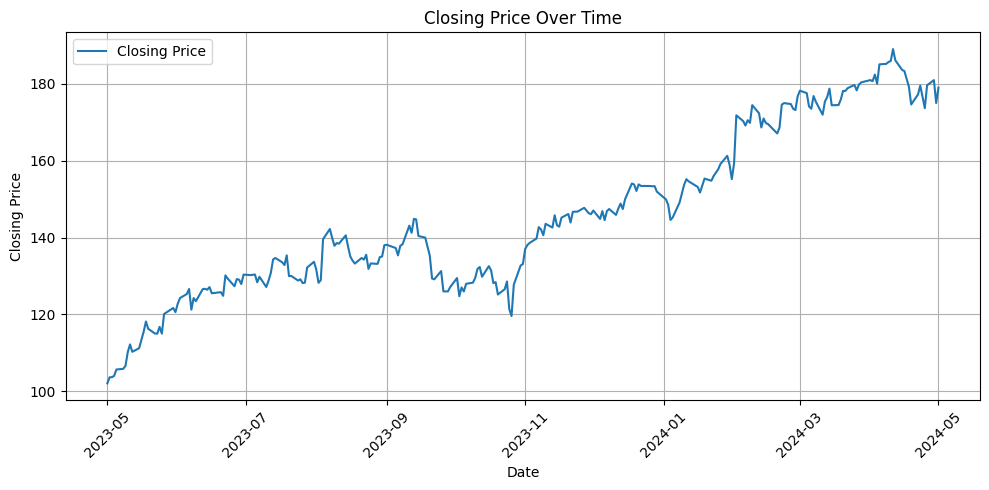

In [241]:
plt.figure(figsize=(10, 5)) 
plt.plot(date_and_closing_pair.index, date_and_closing_pair['Closed'], label='Closing Price')
plt.title('Closing Price Over Time')  
plt.xlabel('Date')  
plt.ylabel('Closing Price') 
plt.legend() 
plt.grid(True) 
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()  

<h3> Creating  40 lagged features  for 2023-2034 dataset <h3>

In [242]:

for i in range(0, 40):
    date_and_closing_pair[f'lag_{i}'] = date_and_closing_pair['Closed'].shift(i)
    date_and_closing_pair[f'lag_{i}']=  date_and_closing_pair[f'lag_{i}'].fillna(0.0)






In [243]:
X = date_and_closing_pair[[f'lag_{i}' for i in range(1, 4)]]  # using lag_1 to lag_40 as features
y = date_and_closing_pair['Closed']

print(X)

                 lag_1       lag_2       lag_3
Date                                          
2023-05-01    0.000000    0.000000    0.000000
2023-05-02  102.050003    0.000000    0.000000
2023-05-03  103.629997  102.050003    0.000000
2023-05-04  103.650002  103.629997  102.050003
2023-05-05  104.000000  103.650002  103.629997
...                ...         ...         ...
2024-04-25  176.589996  179.539993  177.229996
2024-04-26  173.669998  176.589996  179.539993
2024-04-29  179.619995  173.669998  176.589996
2024-04-30  180.960007  179.619995  173.669998
2024-05-01  175.000000  180.960007  179.619995

[253 rows x 3 columns]


<h3>Split the dataset into   train and test datasets

In [244]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)  # random_state ensures reproducibility


<h3> Initialize and train linear regression model on 2023-2024 dataset <h3>

In [245]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

<h3> Start predicting and measuring  the accuracy <h3>

In [246]:
# Predict the values for the testing set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally calculate the Root Mean Squared Error
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 19.950217571278937
Root Mean Squared Error: 4.46656664243118


<h3>Plotting the predicted value vs actual value <h3>

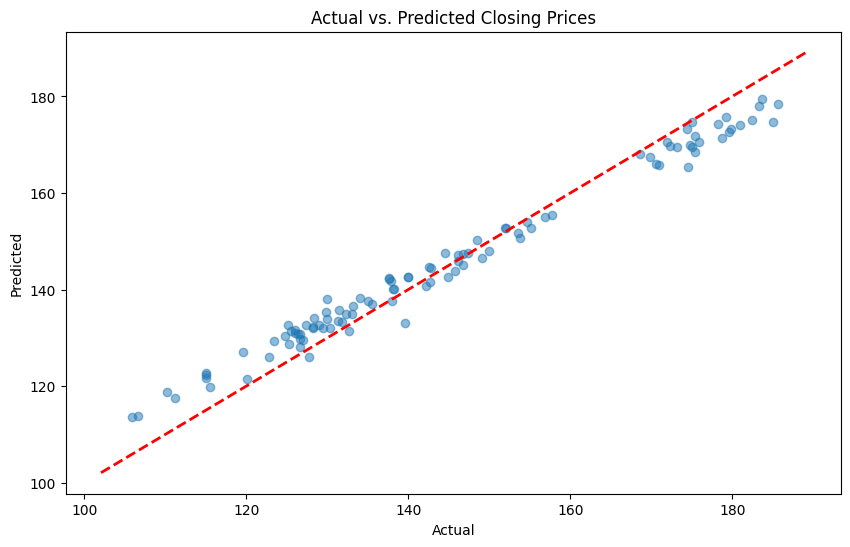

In [247]:


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Closing Prices')
plt.show()



[138.30353728 137.28202627 136.49793383 137.51050085 137.08079225
 138.17955446 135.34827994 136.62347632 136.15589674 137.61808029
 137.68245881 140.04743647 140.07095696 139.70401535 138.30337957
 140.13947601 140.18440401 144.05797198 142.56877013 145.78268439
 145.42053552 142.51334666 142.30256474 140.14839811 138.41467335
 133.78602134 133.56078621 134.62443308 130.58425893 130.91687878
 130.42533788 131.28015867 133.00616592 129.49907148 131.54517471
 130.26764572 132.00530293 132.08339269 133.17650583 134.9358793
 135.36514804 133.6663444  135.8461626  134.73100626 132.51011253
 132.69608386 129.95696597 131.10544677 132.27009886 126.97265964
 125.97383854 131.47952863 134.83197536 135.75124658 139.13540016
 139.87485662 140.60871549 141.54964993 143.79730358 143.35624306
 142.53826874 144.73642399 143.79722358 146.50362217 144.38328464
 144.46940859 145.99923417 146.61820092 145.14054487 147.39188734
 147.13660548 148.13929301 147.59233185 147.16951676 146.94983118
 147.594490

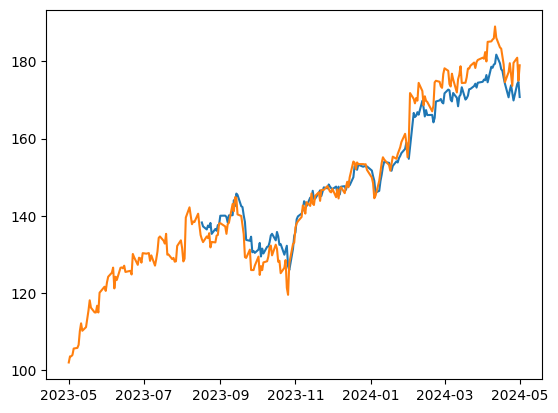

In [249]:

y_pred =  model.predict(X[int(0.3*len(X)):])
date =date_and_closing_pair.index
print(y_pred)

print(y_pred.shape)
print(date.shape)
plt.plot(date[int(0.3*len(X)):],y_pred)
plt.plot(date,date_and_closing_pair['Closed'])



<h3> Conclusion <h3>

<h4> Using linear  simple regression model on non-stationary data is clearly overfitting despite  choosing  highly correlated features <h4>